In [2]:
from scripts.utils.utils import *
from scripts.preprocessing.preprocessing import *
from scripts.preprocessing.data_loader import ThermalDataset

import numpy as np
import os 

/home/ahmd/anaconda3/envs/MLOps/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/ahmd/anaconda3/envs/MLOps/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c107WarningC1ENS_7variantIJNS0_11UserWarningENS0_18DeprecationWarningEEEERKNS_14SourceLocationENSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEEb'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
data_path = "../BCXTT/data"
images_dir = "/home/ahmd/MLOps/data/database"
masks_dir = "/home/ahmd/MLOps/data/labels"
print("Images directory: ", images_dir, " Masks directory: ", masks_dir)

dataset = ThermalDataset(
    images_dir=images_dir,
    masks_dir=masks_dir,
    height=128, 
    width=192,
)
print("Number of images: ", len(dataset))

img, msk = dataset[0]
print("img:", img.shape, img.dtype)   # [1, 128,192], float32
print("msk:", msk.shape, msk.dtype)   # [1, 128,192], float32

Images directory:  /home/ahmd/MLOps/data/database  Masks directory:  /home/ahmd/MLOps/data/labels
Number of images:  1000
img: torch.Size([1, 128, 192]) torch.float32
msk: torch.Size([1, 128, 192]) torch.float32


In [5]:
# print the precise dtype of the images
print("Images dtype: ", dataset[0][0].dtype)
# print the precise dtype of the masks
print("Masks dtype: ", dataset[0][1].dtype)

Images dtype:  torch.float32
Masks dtype:  torch.float32


Image shape:  (128, 192)
Mask shape:  (128, 192)
Image min:  0.007843138
Image max:  1.0
Mask unique values:  [0. 1.]


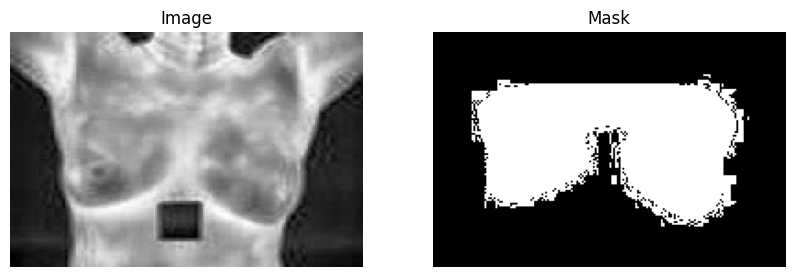

Image shape:  (128, 192)
Mask shape:  (128, 192)
Image min:  0.007843138
Image max:  1.0
Mask unique values:  [0. 1.]


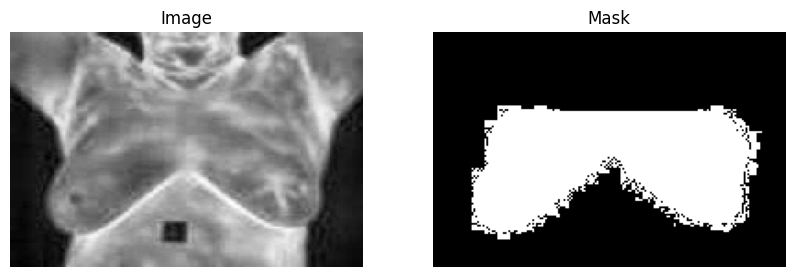

In [6]:
# plot every 3 images in the dataset both the image, the mask, and print the min and max for the image and the unique values for the mask
for i in range(0, 6, 3):
    image, mask = dataset[i]
    # convert from tensor to numpy array
    image = image.numpy()
    mask = mask.numpy()

    # convert from shape (1, 128, 192) to (128, 192) for plotting
    image = np.squeeze(image)
    mask = np.squeeze(mask)

    print("Image shape: ", image.shape)
    print("Mask shape: ", mask.shape)
    print("Image min: ", np.min(image))
    print("Image max: ", np.max(image))
    print("Mask unique values: ", np.unique(mask))
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Image")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    plt.axis('off')
    plt.show()